In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('../../../ao3_data/tfidf_merged_chs_20211216_no_crossover/')

In [2]:
all_tfidf_df = None
# loop through every file in current directory
# and concatenate each data frame into all_tfidf_df

for file in os.listdir():
    if file.endswith('.tsv'):
        tfidf_df = pd.read_csv(file, sep='\t')
        if all_tfidf_df is None:
            all_tfidf_df = tfidf_df
        else:
            all_tfidf_df = pd.concat([all_tfidf_df, tfidf_df], ignore_index=True)

In [3]:
all_tfidf_df['Cos'].median()

0.2642774105439776

In [4]:
all_tfidf_df['Cos'].max()

0.9942193485483104

In [5]:
temp_for_viz_df = all_tfidf_df.copy()

def remove_0_and_nan_values(df, novelty):
    # remove 0 and  nan values
    df.dropna(subset=[novelty, 'Kudos', 'Hits'],inplace=True)
    df = df[df[novelty] != 0]
    df = df[df['Kudos'] != 0]
    df = df[df['Hits'] != 0]
    return df

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'Cos')

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    if row['Cos'] > 0.3:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'high_novelty'
    else:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'low_novelty'
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']

print(len(temp_for_viz_df))

520730


In [6]:
# count low novelty and high novelty
low = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'low_novelty']
high = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'high_novelty']
print(len(low), len(high))

303483 217247


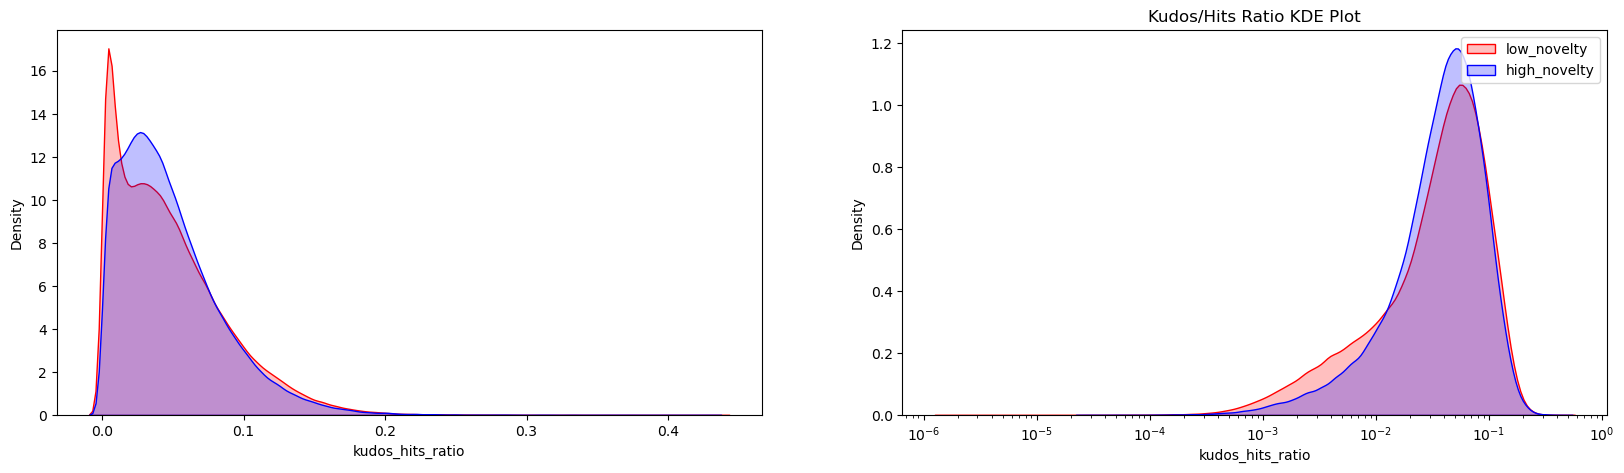

In [7]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend()

In [8]:
# sort low and high rows by Hits
low = low.sort_values(by='Hits', ascending=True)
high = high.sort_values(by='Hits', ascending=True)

/home/dwright/mambaforge/envs/retel/lib/python3.9/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='Cos', ylabel='kudos_hits_ratio'>

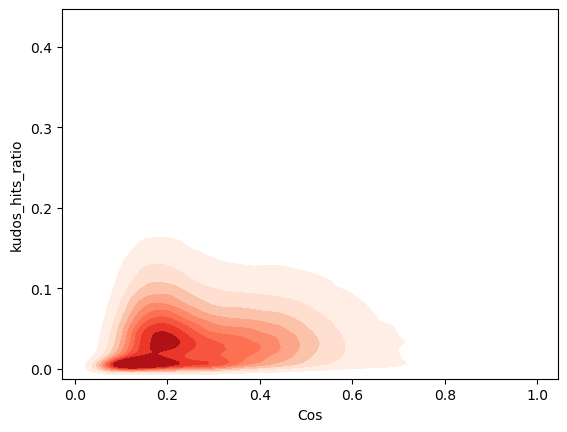

In [9]:
# Same plots as above but using 2D KDE instead of categories

temp_for_viz_df = all_tfidf_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'Cos')

# sort by JSD values
temp_for_viz_df = temp_for_viz_df.sort_values(by=['Cos'])

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']
    
# # assign low to bottom 50% and high to top 50%
# low = temp_for_viz_df.iloc[:int(len(temp_for_viz_df)/2)]
# high = temp_for_viz_df.iloc[int(len(temp_for_viz_df)/2):]

# fig, ax = plt.subplots(1,2, figsize=(20, 5))
# plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(x=temp_for_viz_df['Cos'], y=temp_for_viz_df['kudos_hits_ratio'], color='r', fill=True, cmap='Reds', shade_lowest=False, label='low_novelty')
# g = sns.jointplot(x = low['Kudos'], y = low['Hits'], kind='kde', color='r', fill=True,
#                   cmap='Reds', shade_lowest=False, label='low_novelty')
# g.set_axis_labels('Kudos', 'Hits')
# sns.kdeplot(high['Kudos'].sort_values(), high['Hits'].sort_values, ax=ax[0], color='blue', shade=True, label='high_novelty')

# sns.kdeplot(low['Kudos'].sort_values(), low['Hits'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
# sns.kdeplot(high['Kudos'], high['Hits'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
# plt.legend()

In [10]:
temp_for_viz_df = all_tfidf_df.copy()
temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'Cos')

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    if row['Cos'] > 0.5:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'high_novelty'
    else:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'low_novelty'
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']

print(len(temp_for_viz_df))

520730


In [11]:
# count low novelty and high novelty
low = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'low_novelty']
high = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'high_novelty']
print(len(low), len(high))

467007 53723


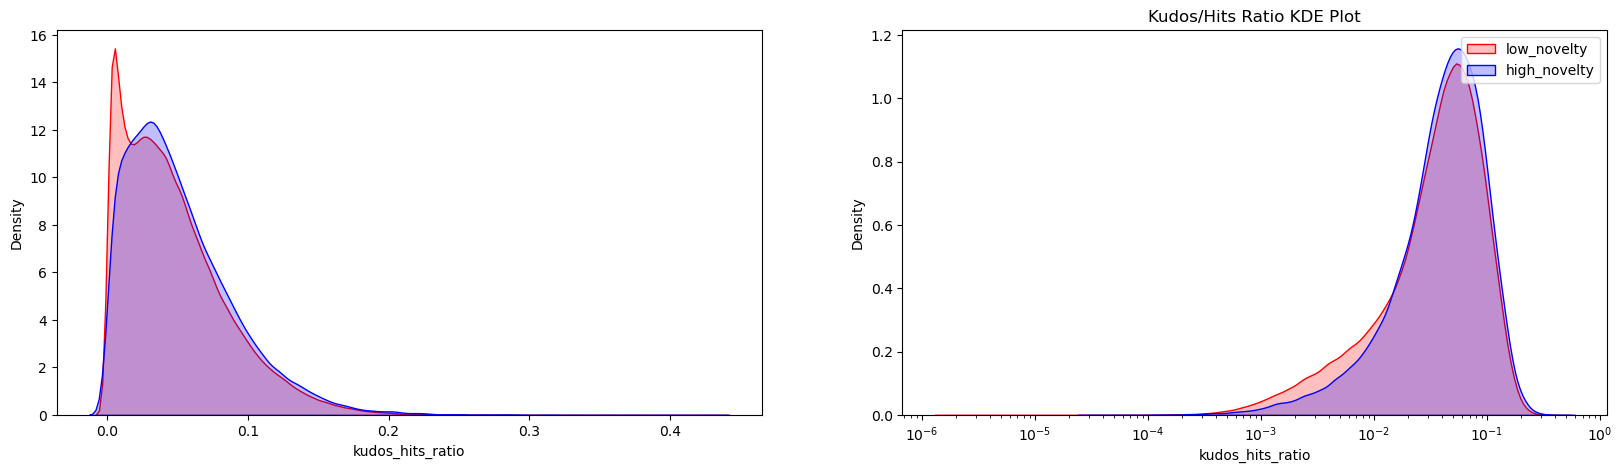

In [12]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend()

In [13]:
os.chdir('../lda_merged_chs_20211216_no_crossover/')

In [14]:
all_lda_df = None

# loop through every file in current directory
# and concatenate each data frame into all_lda_df

for file in os.listdir():
    if file.endswith('.tsv'):
        lda_df = pd.read_csv(file, sep='\t')
        if all_lda_df is None:
            all_lda_df = lda_df
        else:
            all_lda_df = pd.concat([all_lda_df, lda_df], ignore_index=True)
            
# print the mean of the JSD values
all_lda_df['JSD'].median()

0.35720671324855147

In [15]:
all_lda_df['JSD'].max()

0.692548066912309

In [16]:
temp_for_viz_df = all_lda_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'JSD')

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    if row['JSD'] > 0.4:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'high_novelty'
    else:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'low_novelty'
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']

print(len(temp_for_viz_df))

520730


In [17]:
# count low novelty and high novelty
low = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'low_novelty']
high = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'high_novelty']
print(len(low), len(high))

320248 200482


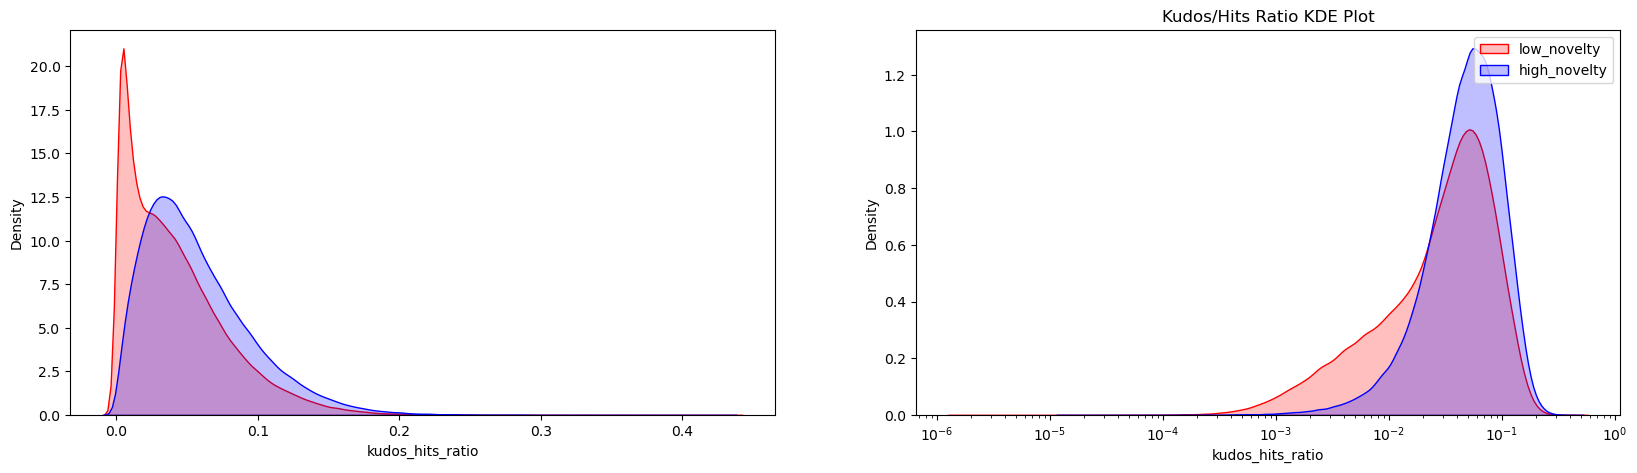

In [18]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend()

In [19]:
temp_for_viz_df = all_lda_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'JSD')

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    if row['JSD'] > 0.5:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'high_novelty'
    else:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'low_novelty'
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']

print(len(temp_for_viz_df))

520730


In [20]:
# count low novelty and high novelty
low = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'low_novelty']
high = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'high_novelty']
print(len(low), len(high))

442112 78618


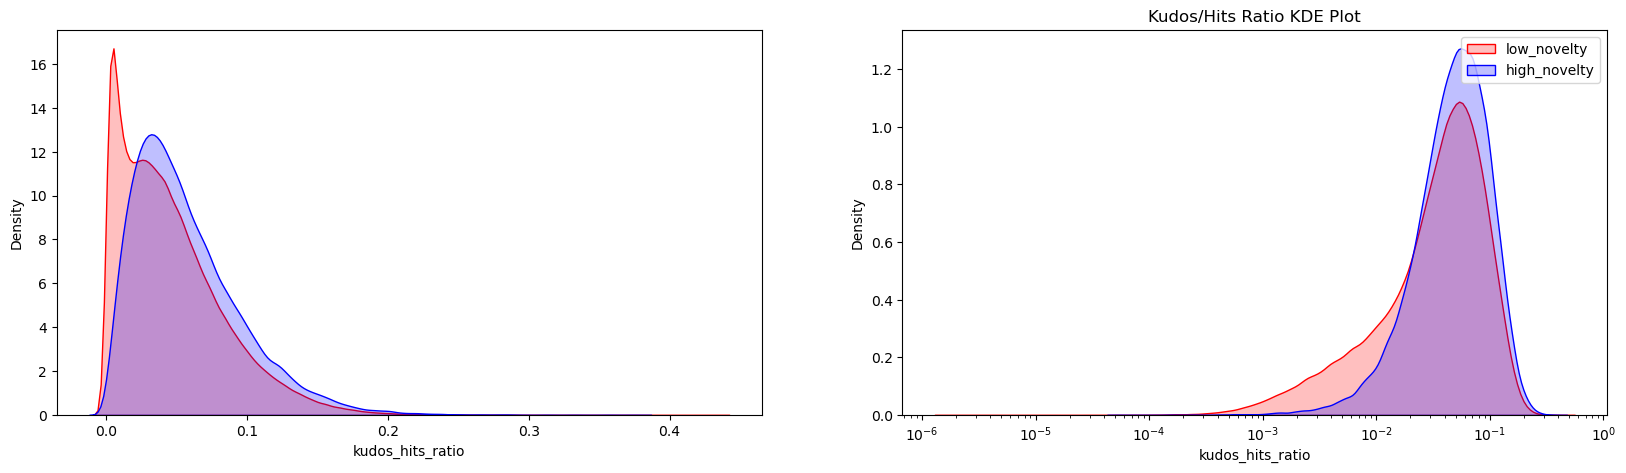

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend()

520730
260365 260365


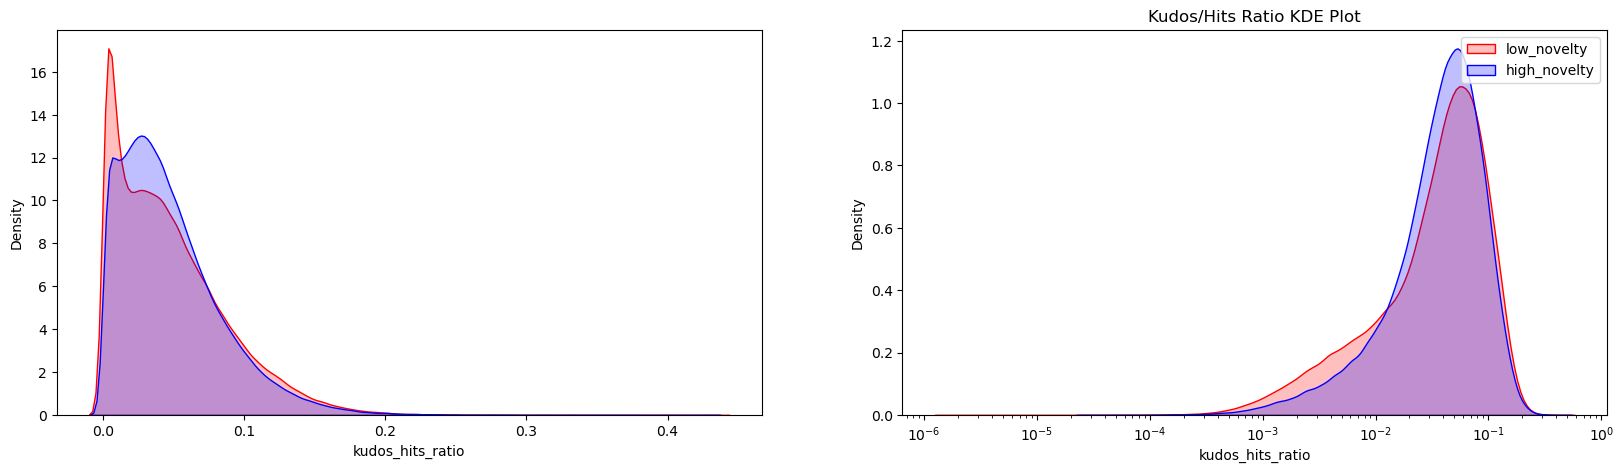

In [22]:
# Same plots as above for term frequency, but low and high novelty
# are categorized by bottom 50% and top 50% of Cos values

temp_for_viz_df = all_tfidf_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'Cos')

# sort by JSD values
temp_for_viz_df = temp_for_viz_df.sort_values(by=['Cos'])

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']
    
# assign low to bottom 50% and high to top 50%
low = temp_for_viz_df.iloc[:int(len(temp_for_viz_df)/2)]
high = temp_for_viz_df.iloc[int(len(temp_for_viz_df)/2):]

print(len(temp_for_viz_df))
print(len(low), len(high))

fig, ax = plt.subplots(1,2, figsize=(20, 5))
plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend()

520730
260365 260365


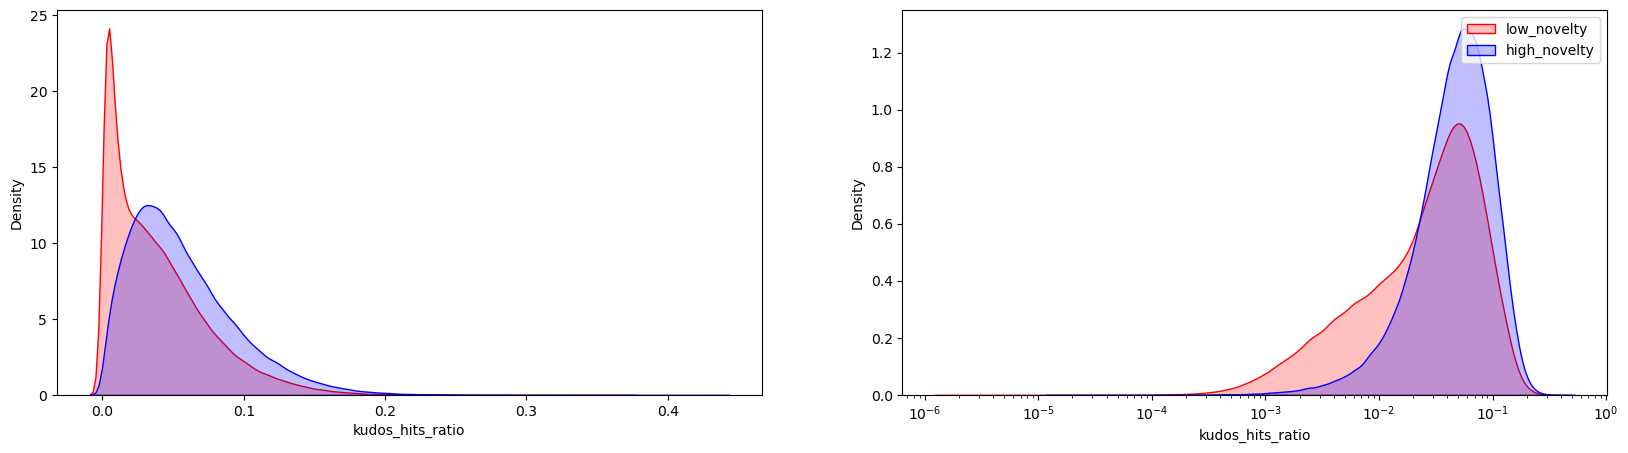

In [23]:
# Same plots as above for topic novelty, but low and high novelty
# are categorized by bottom 50% and top 50% of JSD values

temp_for_viz_df = all_lda_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'JSD')

# sort by JSD values
temp_for_viz_df = temp_for_viz_df.sort_values(by=['JSD'])

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']
    
# assign low to bottom 50% and high to top 50%
low = temp_for_viz_df.iloc[:int(len(temp_for_viz_df)/2)]
high = temp_for_viz_df.iloc[int(len(temp_for_viz_df)/2):]

print(len(temp_for_viz_df))
print(len(low), len(high))

fig, ax = plt.subplots(1,2, figsize=(20, 5))
# plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend()
plt.savefig('kudos_hits_ratio_kde_plot_topic_novelty_top_bottom_50p.png')

520730
130182 130183


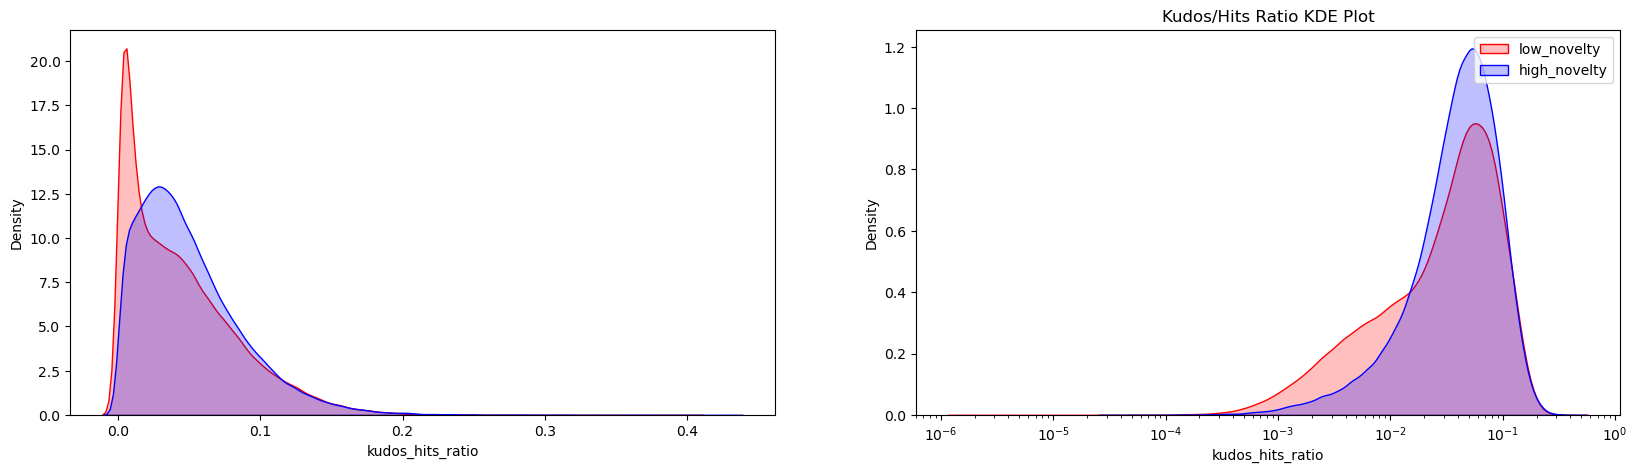

In [24]:
# Same plots as above for term frequency, but low and high novelty
# are categorized by bottom 25% and top 25% of Cos values

temp_for_viz_df = all_tfidf_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'Cos')

# sort by JSD values
temp_for_viz_df = temp_for_viz_df.sort_values(by=['Cos'])

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']
    
# assign low to bottom 25% and high to top 25%
low = temp_for_viz_df.iloc[:int(len(temp_for_viz_df)/4)]
high = temp_for_viz_df.iloc[int(len(temp_for_viz_df)*3/4):]

print(len(temp_for_viz_df))
print(len(low), len(high))

fig, ax = plt.subplots(1,2, figsize=(20, 5))
plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend()

520730
130182 130183


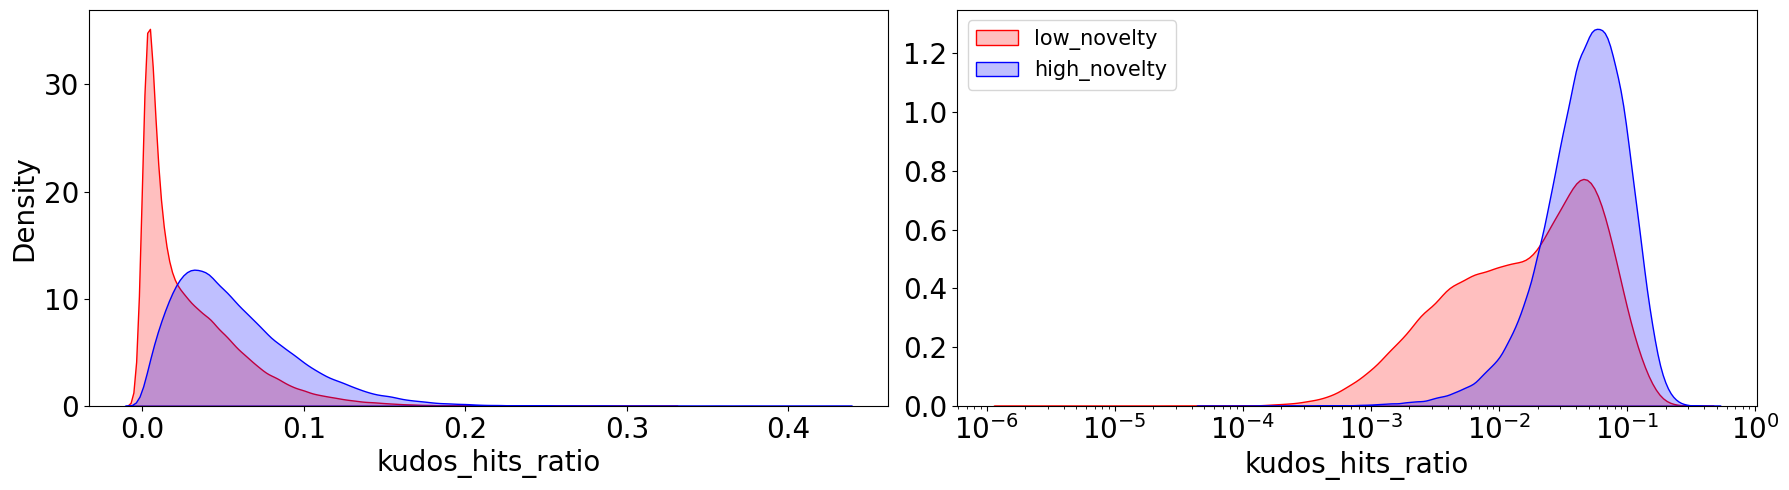

In [54]:
# Same plots as above for topic novelty, but low and high novelty
# are categorized by bottom 25% and top 25% of JSD values

temp_for_viz_df = all_lda_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'JSD')

# sort by JSD values
temp_for_viz_df = temp_for_viz_df.sort_values(by=['JSD'])

# loop over all rows in temp_for_viz_df, add a
# column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']
    
# assign low to bottom 25% and high to top 25%
low = temp_for_viz_df.iloc[:int(len(temp_for_viz_df)/4)]
high = temp_for_viz_df.iloc[int(len(temp_for_viz_df)*3/4):]

print(len(temp_for_viz_df))
print(len(low), len(high))

fig, ax = plt.subplots(1,2, figsize=(18, 5))
# plt.tight_layout()
# plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')
ax[0].set_xlabel('kudos_hits_ratio', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
# change xtick label size
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend(loc = 'upper left', fontsize=15)
plt.xlabel(xlabel="kudos_hits_ratio",fontsize=20)
plt.ylabel(ylabel="", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.savefig('kudos_hits_ratio_kde_plot_topic_novelty_top_bottom_25p.pdf')

520730
130182 130183


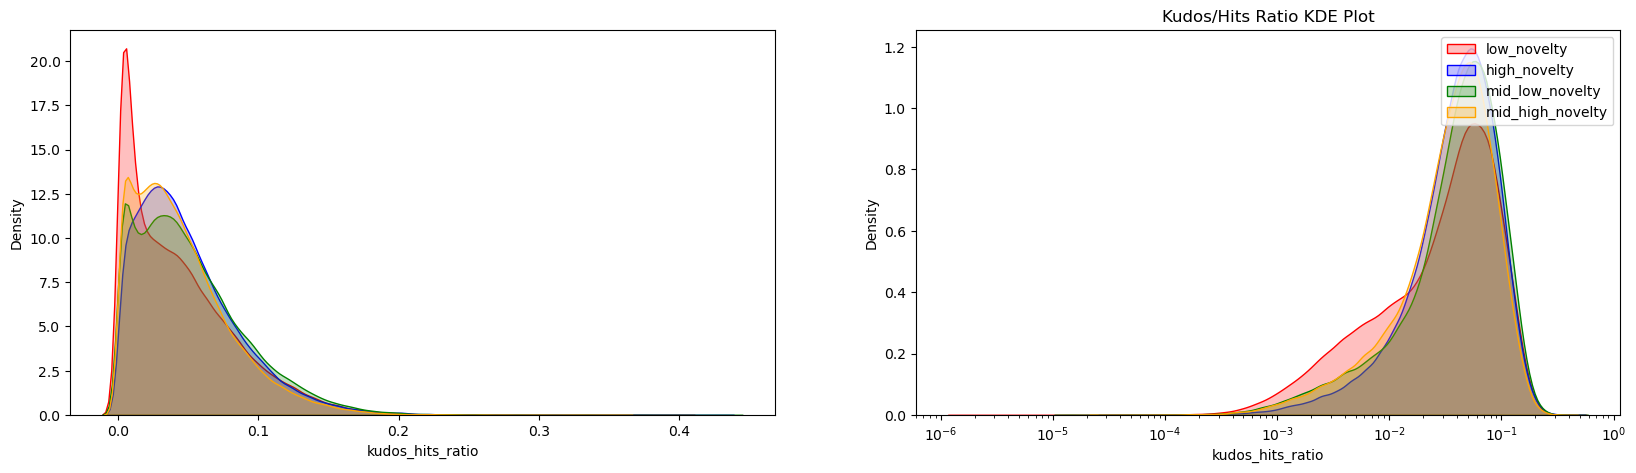

In [26]:
# Same plots as above for term frequency, but now considering
# low, mid-low, mid-high, and high novelty by categorizing
# bottom 25%, 25-50%, 50-75%, and top 25% of Cos values

temp_for_viz_df = all_tfidf_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'Cos')

# sort by JSD values
temp_for_viz_df = temp_for_viz_df.sort_values(by=['Cos'])

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']
    
# assign low to bottom 25% and high to top 25%
# assign mid-low to 25-50%, mid-high to 50-75%
low = temp_for_viz_df.iloc[:int(len(temp_for_viz_df)/4)]
mid_low = temp_for_viz_df.iloc[int(len(temp_for_viz_df)/4):int(len(temp_for_viz_df)/2)]
mid_high = temp_for_viz_df.iloc[int(len(temp_for_viz_df)/2):int(len(temp_for_viz_df)*3/4)]
high = temp_for_viz_df.iloc[int(len(temp_for_viz_df)*3/4):]

print(len(temp_for_viz_df))
print(len(low), len(high))

fig, ax = plt.subplots(1,2, figsize=(20, 5))
plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')
sns.kdeplot(mid_low['kudos_hits_ratio'], ax=ax[0], color='green', shade=True, label='mid_low_novelty')
sns.kdeplot(mid_high['kudos_hits_ratio'], ax=ax[0], color='orange', shade=True, label='mid_high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
sns.kdeplot(mid_low['kudos_hits_ratio'], ax=ax[1], color='green', shade=True, label='mid_low_novelty', log_scale=True)
sns.kdeplot(mid_high['kudos_hits_ratio'], ax=ax[1], color='orange', shade=True, label='mid_high_novelty', log_scale=True)
plt.legend()

520730
130182 130183


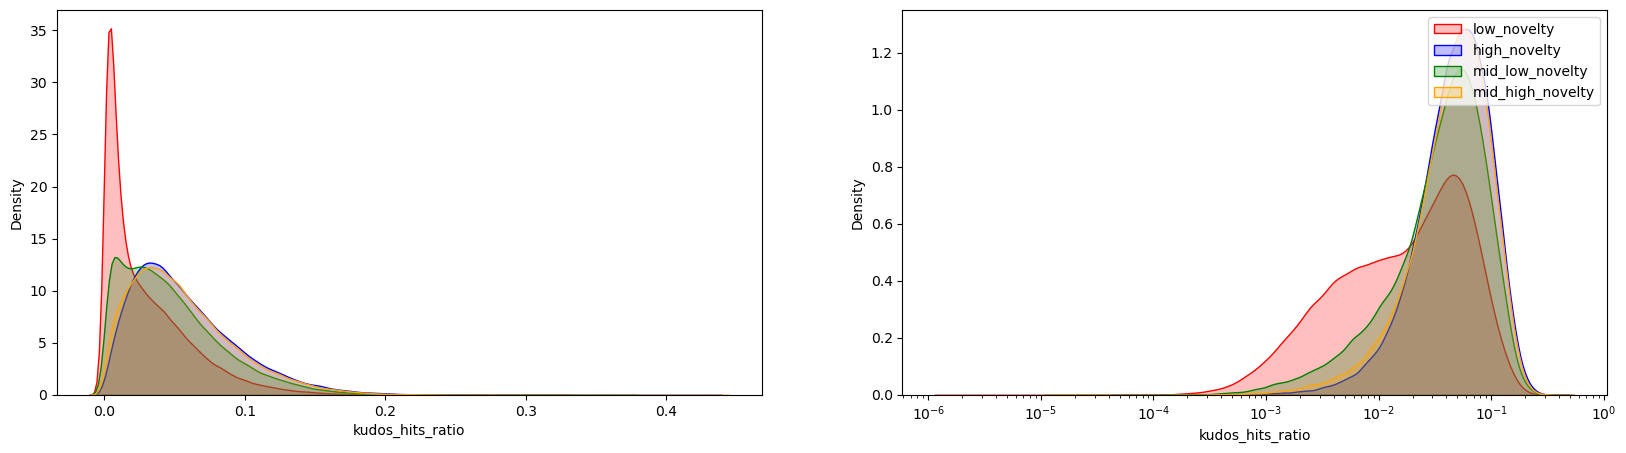

In [27]:
# Same plots as above for topic novelty, but now considering
# low, mid-low, mid-high, and high novelty by categorizing
# bottom 25%, 25-50%, 50-75%, and top 25% of JSD values

temp_for_viz_df = all_lda_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'JSD')

# sort by JSD values
temp_for_viz_df = temp_for_viz_df.sort_values(by=['JSD'])

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']
    
# assign low to bottom 25% and high to top 25%
# assign mid-low to 25-50%, mid-high to 50-75%
low = temp_for_viz_df.iloc[:int(len(temp_for_viz_df)/4)]
mid_low = temp_for_viz_df.iloc[int(len(temp_for_viz_df)/4):int(len(temp_for_viz_df)/2)]
mid_high = temp_for_viz_df.iloc[int(len(temp_for_viz_df)/2):int(len(temp_for_viz_df)*3/4)]
high = temp_for_viz_df.iloc[int(len(temp_for_viz_df)*3/4):]

print(len(temp_for_viz_df))
print(len(low), len(high))

fig, ax = plt.subplots(1,2, figsize=(20, 5))
# plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')
sns.kdeplot(mid_low['kudos_hits_ratio'], ax=ax[0], color='green', shade=True, label='mid_low_novelty')
sns.kdeplot(mid_high['kudos_hits_ratio'], ax=ax[0], color='orange', shade=True, label='mid_high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
sns.kdeplot(mid_low['kudos_hits_ratio'], ax=ax[1], color='green', shade=True, label='mid_low_novelty', log_scale=True)
sns.kdeplot(mid_high['kudos_hits_ratio'], ax=ax[1], color='orange', shade=True, label='mid_high_novelty', log_scale=True)
plt.legend()
plt.savefig('kudos_hits_ratio_kde_plot_topic_novelty_4_categories.png')

/home/dwright/mambaforge/envs/retel/lib/python3.9/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


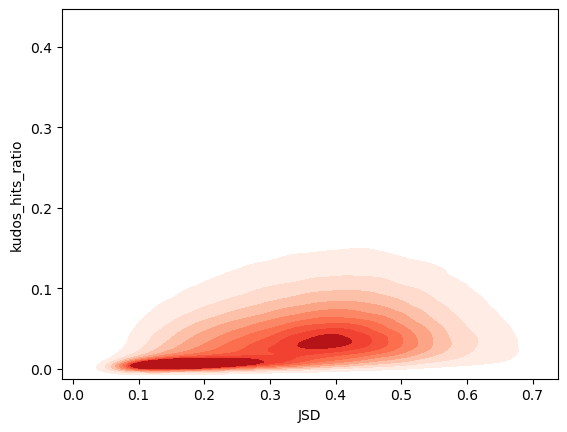

In [28]:
# 2D KDE plot for topic novelty and kudos/hits ratio

temp_for_viz_df = all_lda_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'JSD')

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']
    
g = sns.kdeplot(x=temp_for_viz_df['JSD'], y=temp_for_viz_df['kudos_hits_ratio'], color='r', fill=True, cmap='Reds', shade_lowest=False, label='low_novelty')

# plot
plt.show()
# save the plot
g.figure.savefig('kudos_hits_ratio_2D_KDE_plot_topic_novelty.png')